<a href="https://colab.research.google.com/github/sunitha-18577/Python-Fundamentals/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/exchange_rate1.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [ ]:
df.columns = ['Date','Ex_rate']

df.head()

,Date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


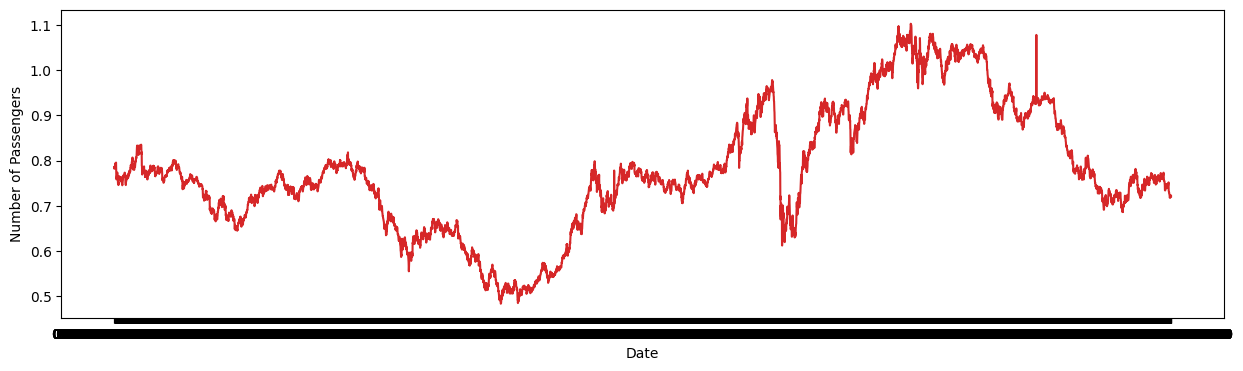

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Ex_rate'])

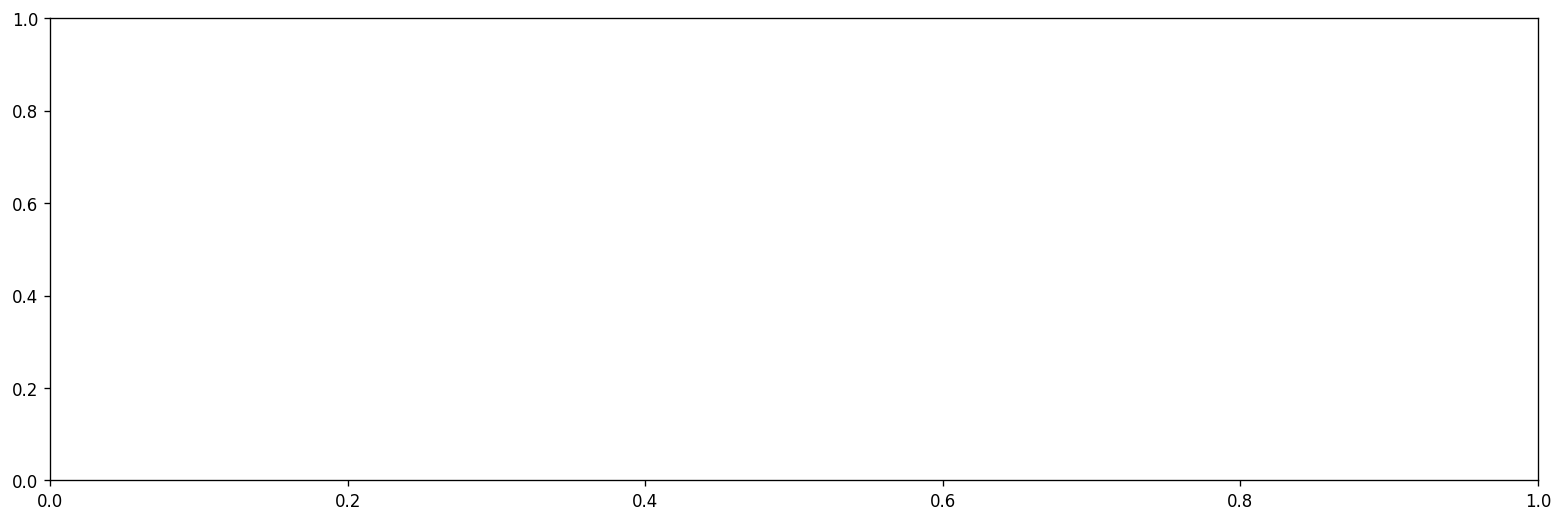

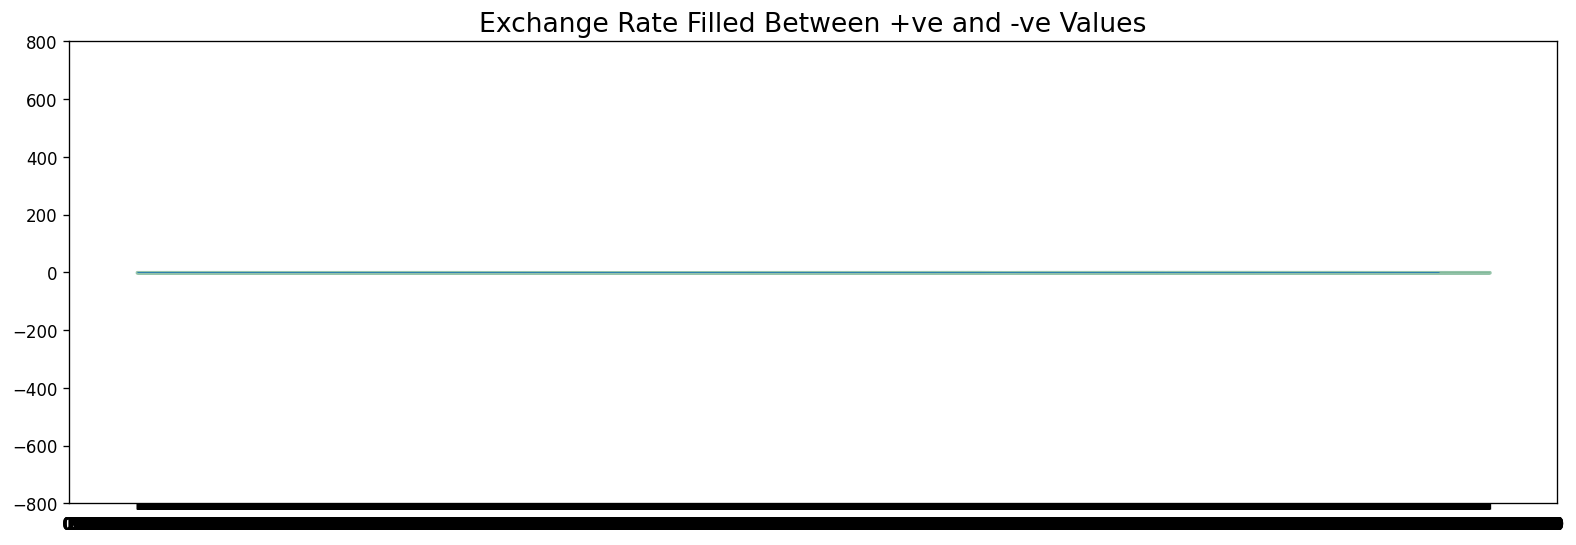

In [ ]:
x = df['Date'].values
y1 = df['Ex_rate'].values
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
x = df['Date'].values
y1 = df['Ex_rate'].values
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Exchange Rate Filled Between +ve and -ve Values', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()


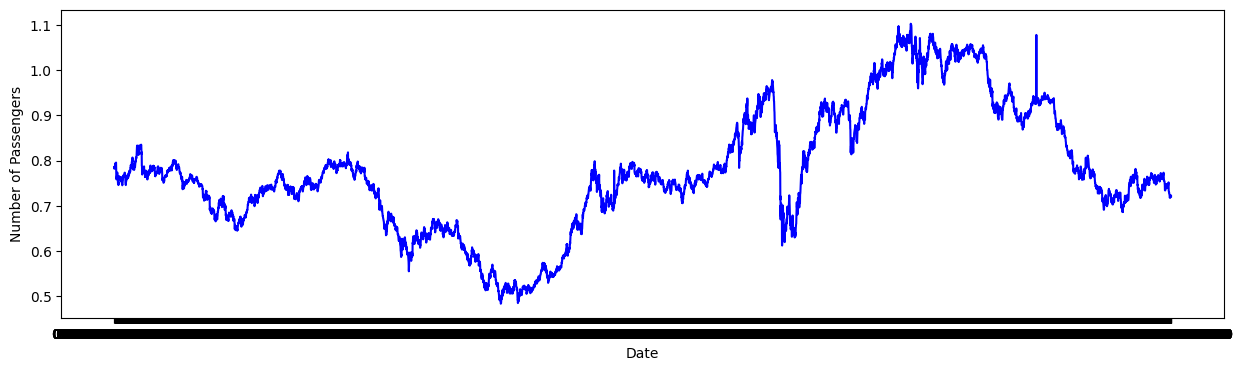

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Ex_rate'])

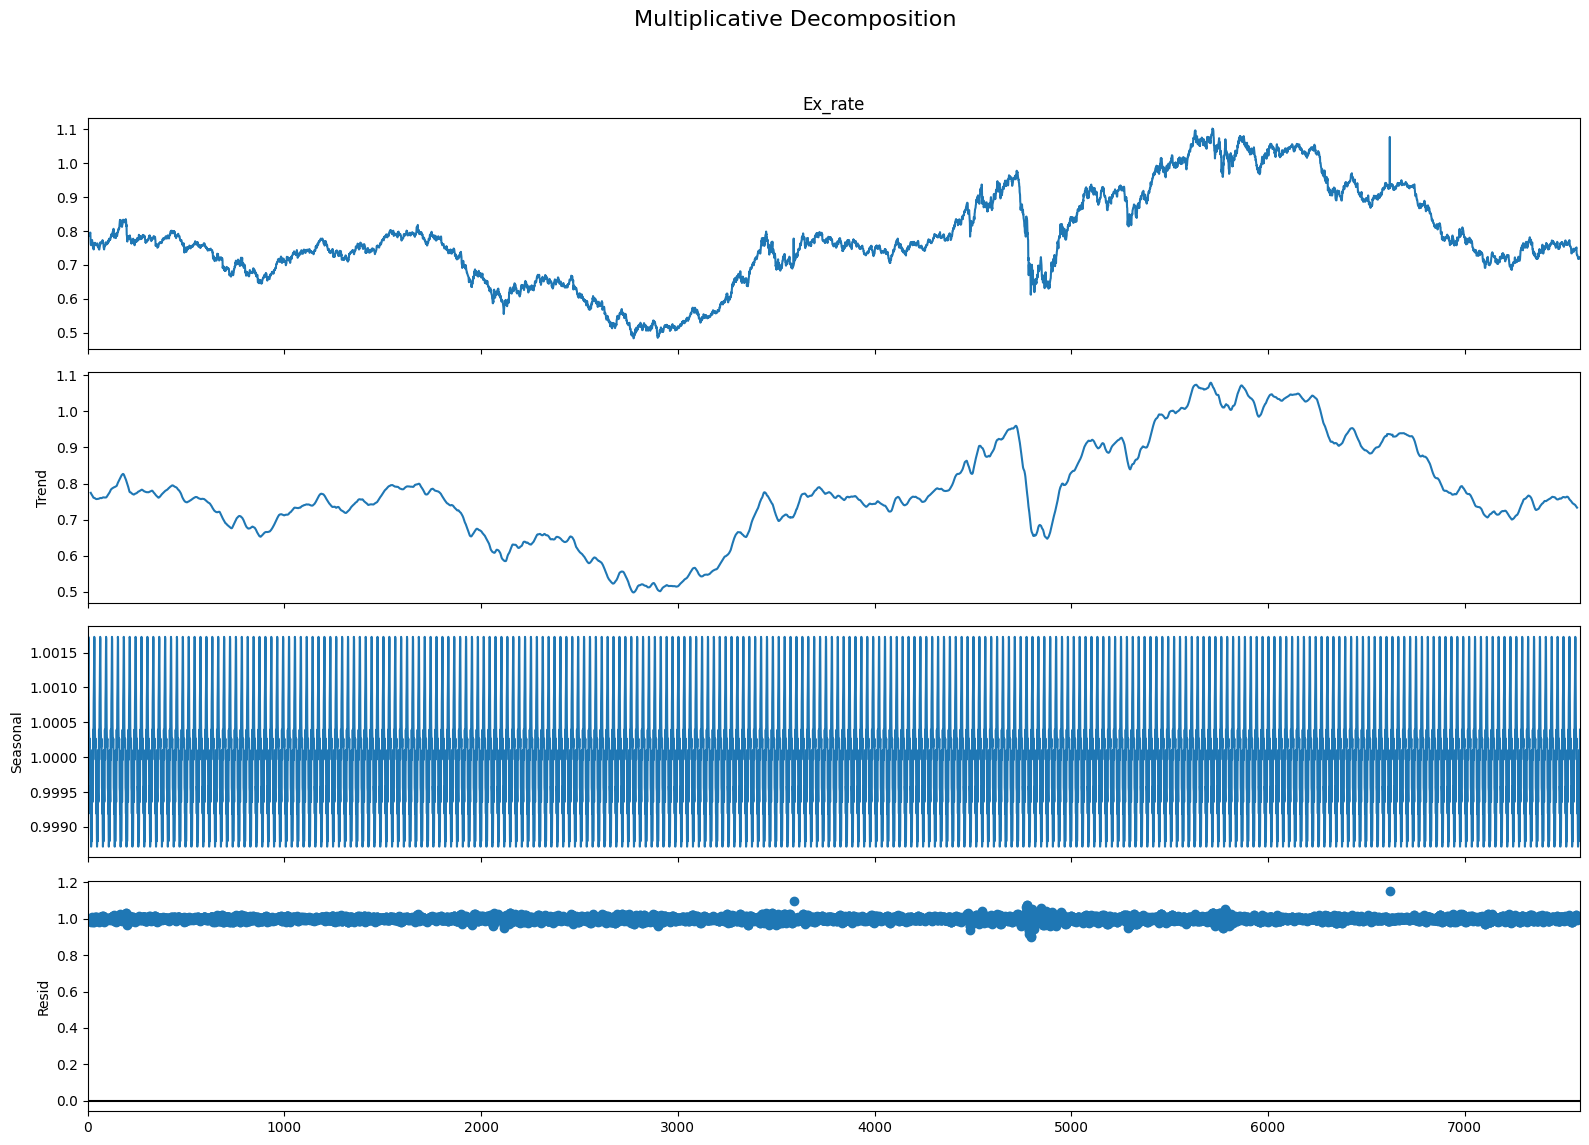

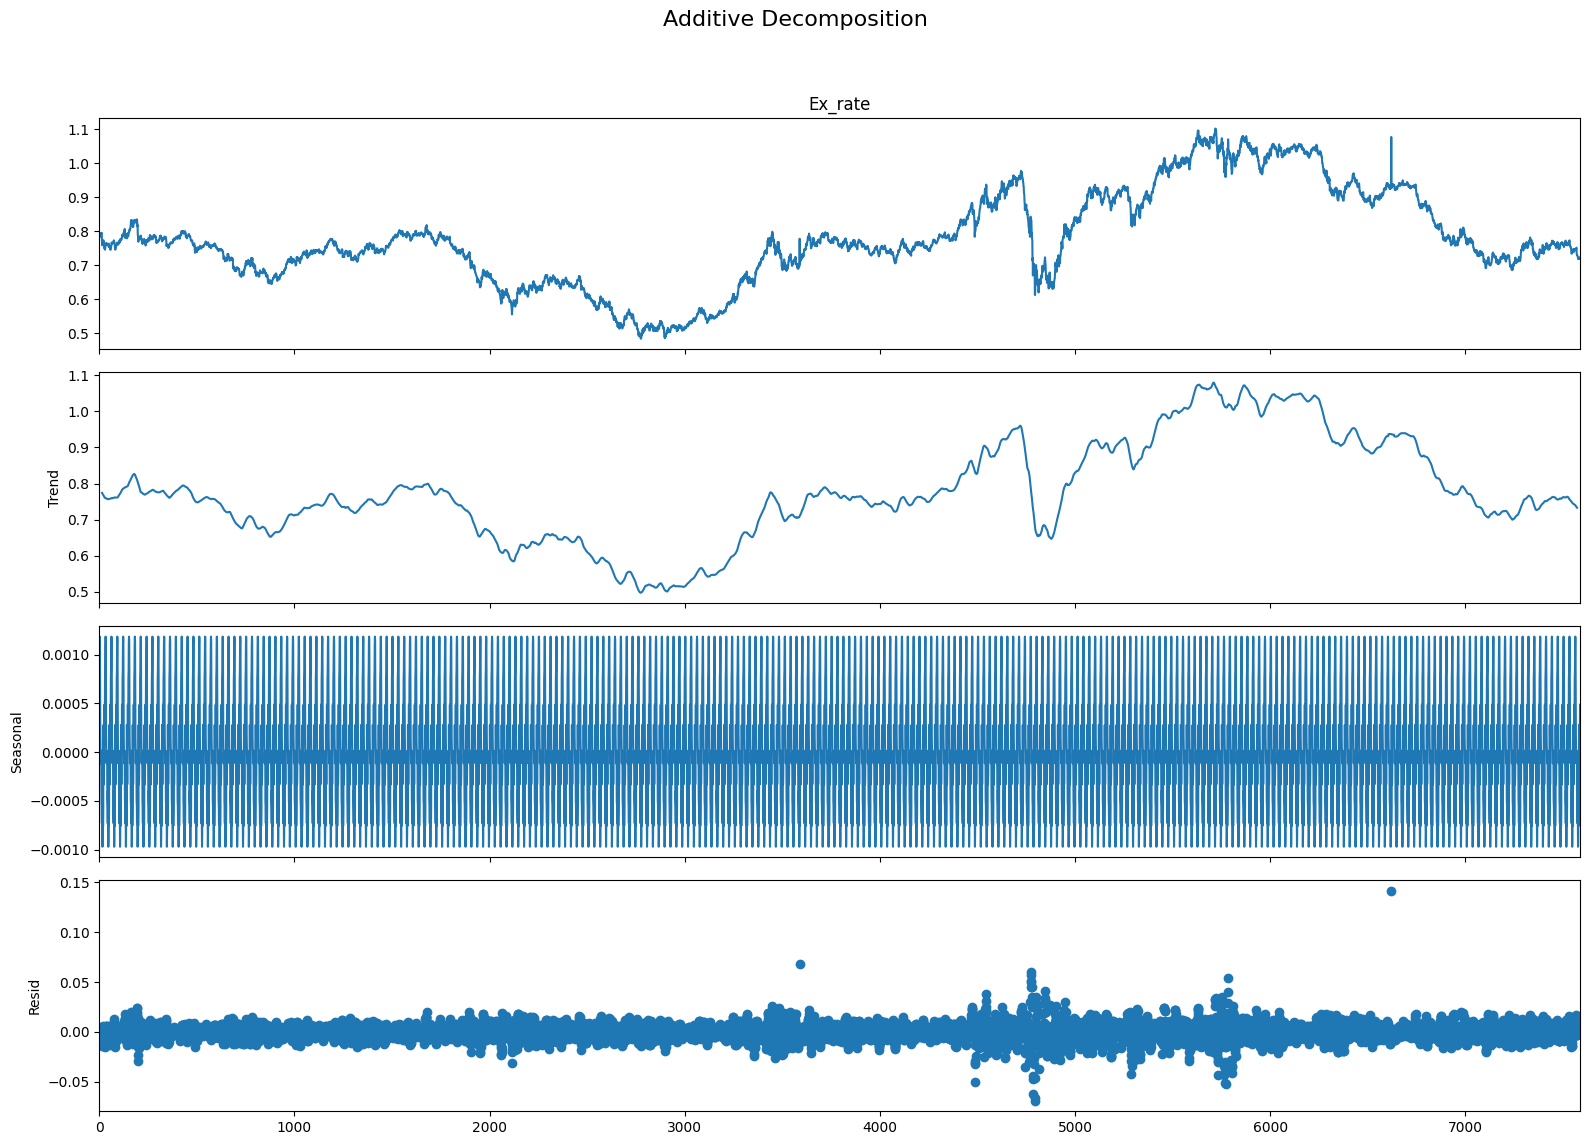

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

multiplicative_decomposition = seasonal_decompose(df['Ex_rate'], model='multiplicative', period=30)
additive_decomposition = seasonal_decompose(df['Ex_rate'], model='additive', period=30)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Axes: title={'center': 'Random White Noise'}>

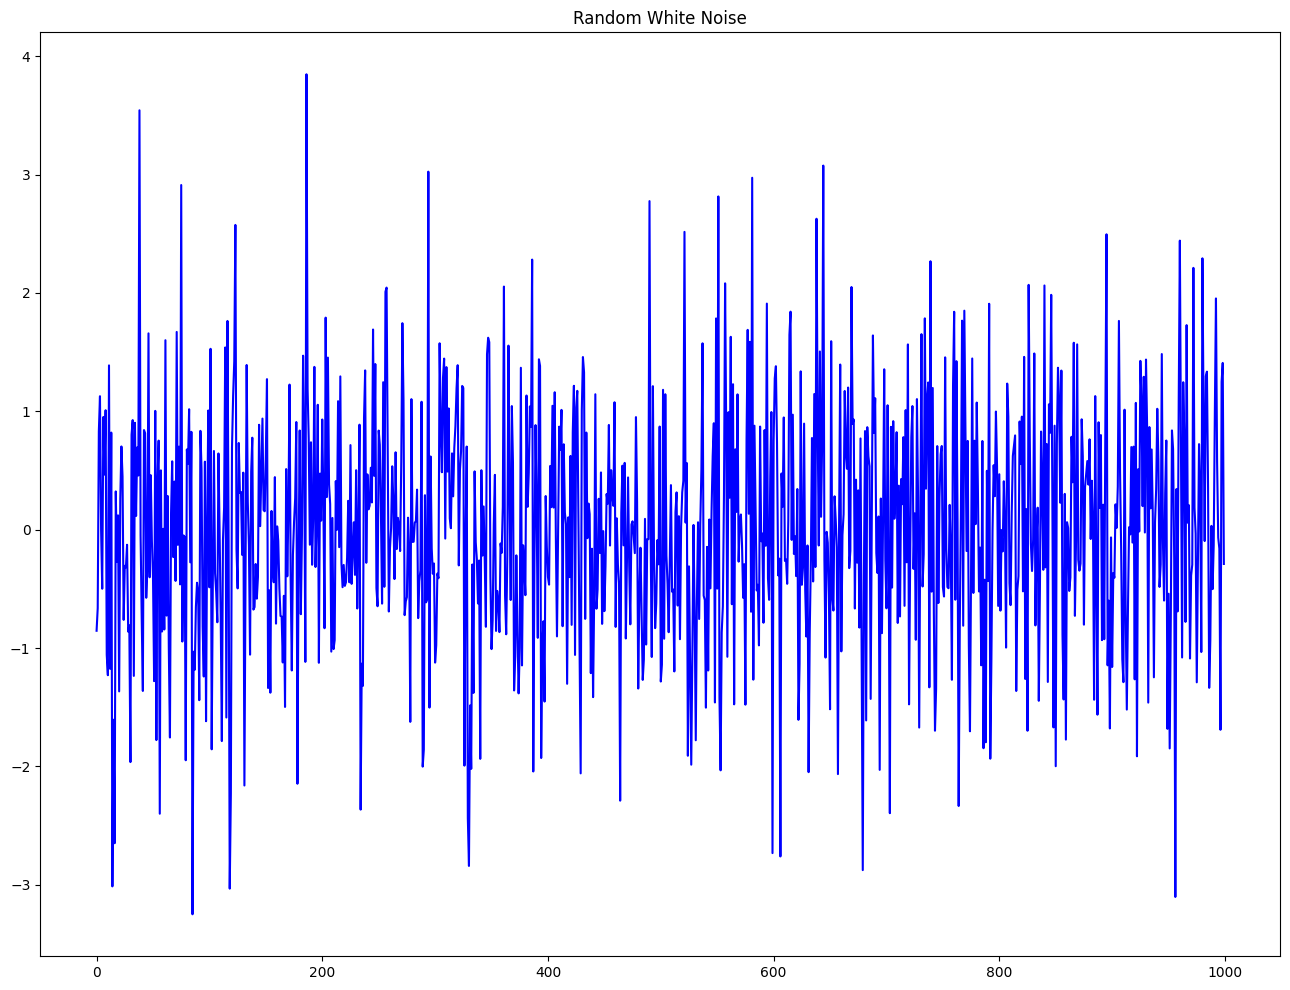

In [ ]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')


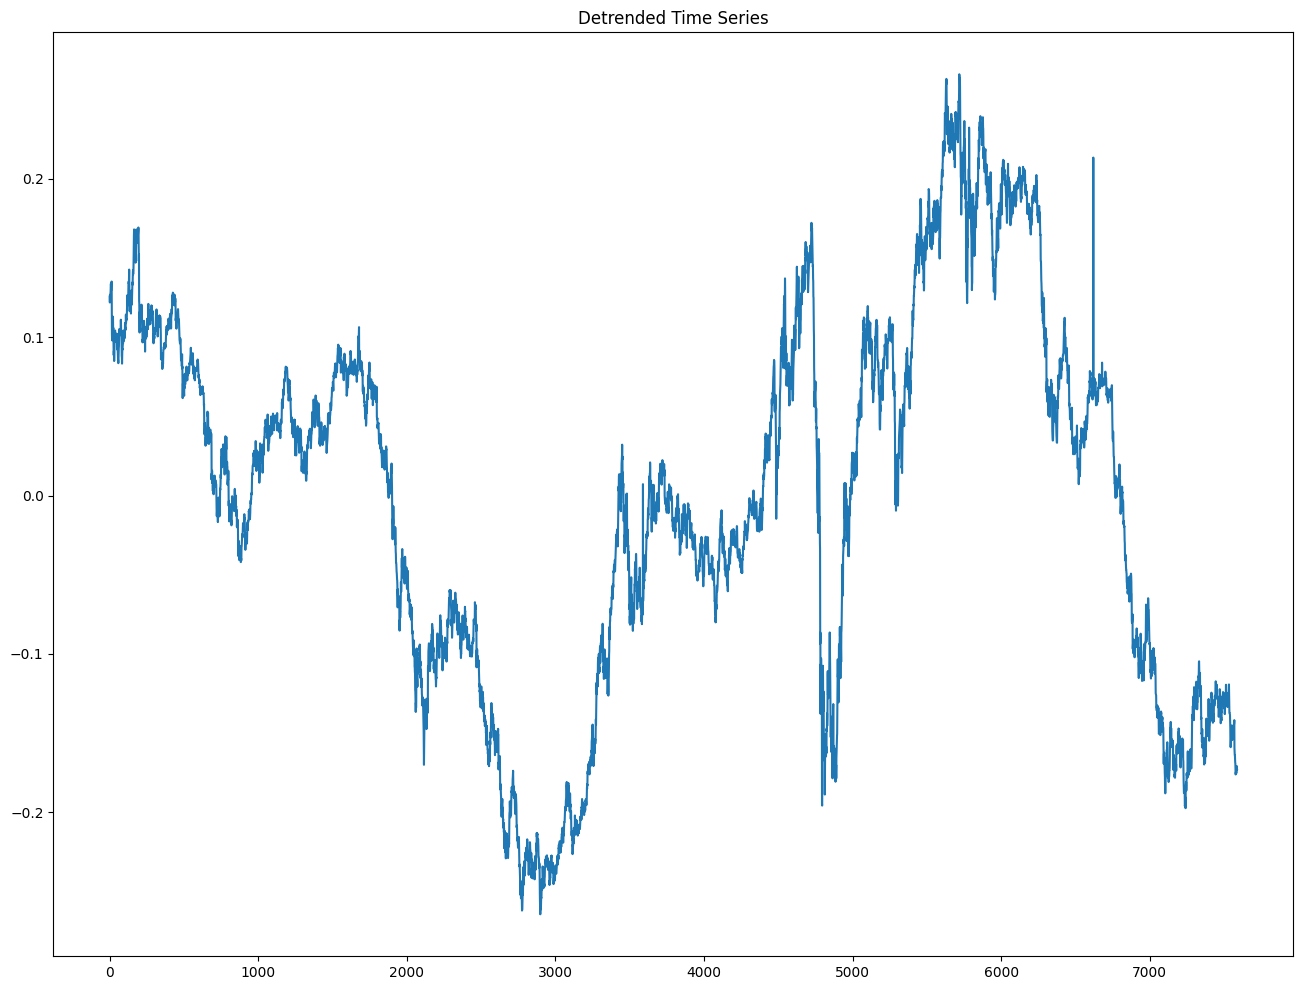

In [ ]:
from scipy import signal
detrended = signal.detrend(df['Ex_rate'].values)
plt.plot(detrended)
plt.title('Detrended Time Series')
plt.show()

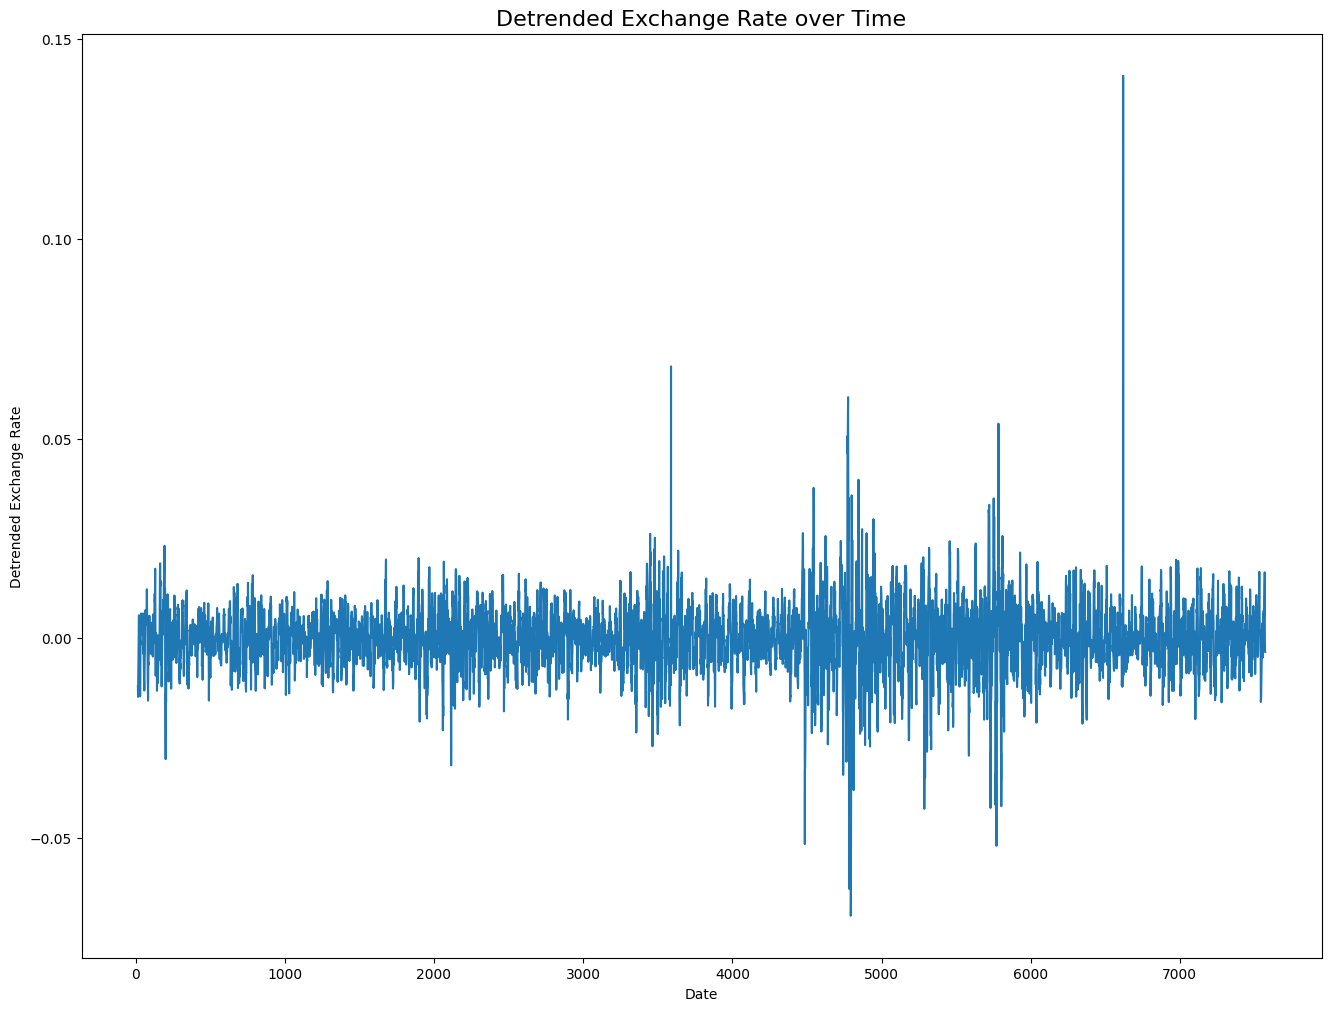

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Ex_rate'], model='multiplicative', period=30)
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Ex_rate'], model='multiplicative', period=30)
detrended = df['Ex_rate'].values - result_mul.trend
plt.plot(detrended)
plt.xlabel("Date")
plt.ylabel("Detrended Exchange Rate")
plt.title("Detrended Exchange Rate over Time", fontsize=16)
plt.show()

In [ ]:
def evaluate_arima_model(data,p,d,q):
  try:
    train_size=int(len(data)*0.8)
    train,test=data[:train_size],data[train_size:]
    model=ARIMA(train,order=(p,d,q))
    model_fit=model.fit()
    predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1,typ='levels')
    mae=mean_absolute_error(test,predictions)
    rmse=np.sqrt(mean_squared_error(test,predictions))
    mape=np.mean(np.abs((test-predictions)/test))*100
    return mae,rmse,mape,predictions
  except Exception as e:
    print(f"An error occurred: {e}")
    return None, None, None, None

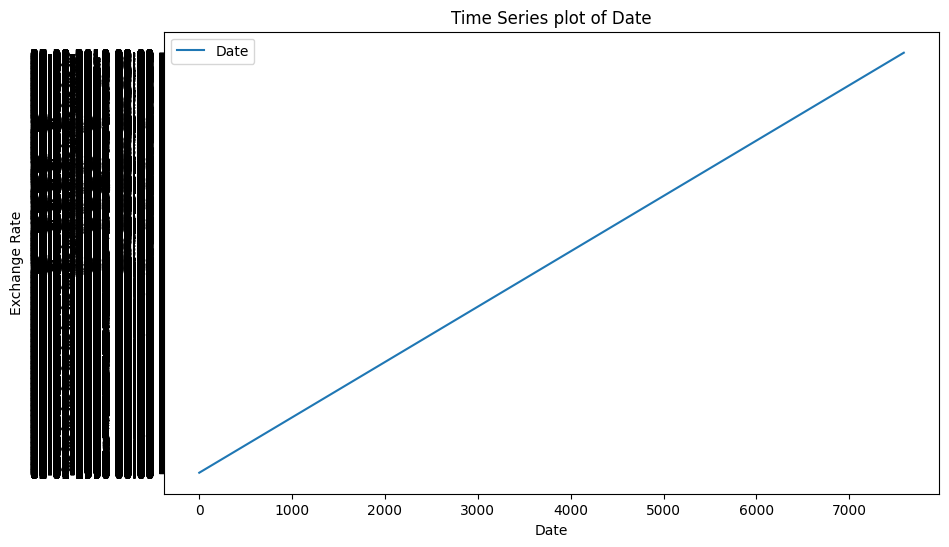

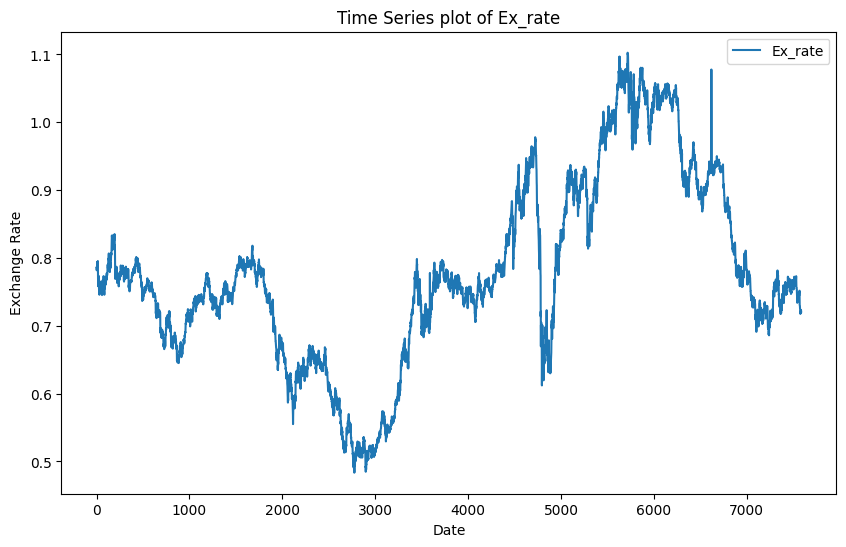

In [ ]:
for column in df.columns:
  plt.figure(figsize=(10,6))
  plt.plot(df[column],label=column)
  plt.title(f'Time Series plot of {column}') # Use f-string for correct formatting
  plt.xlabel('Date')
  plt.ylabel('Exchange Rate')
  plt.legend()
  plt.show()

In [ ]:
for column in df.columns:
  print(f"Evaluating Exponential Smoothing model for {column}:")
  mae,rmse,mape,predictions=evaluate_exponential_smoothing_model(df[column],trend='add',seasonal='add',seasonal_periods=12)
  if mae is not None:
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}")
    plt.figure(figsize=(10,6))
    plt.plot(df.index[train_size:],test,label='Actual')
    plt.plot(df.index[train_size:],predictions,label='Predicted')
    plt.title(f'Exponential Smoothing Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

Evaluating Exponential Smoothing model for Date:


NameError: name 'evaluate_exponential_smoothing_model' is not defined

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Import ExponentialSmoothing

In [ ]:
def evaluate_arima_model(data,p,d,q):
  try:
    train_size=int(len(data)*0.8)
    train,test=data[:train_size],data[train_size:]
    # Assuming ARIMA is imported elsewhere, if not, add:
    # from statsmodels.tsa.arima.model import ARIMA
    model=ARIMA(train,order=(p,d,q))
    model_fit=model.fit()
    predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1,typ='levels')
    mae=mean_absolute_error(test,predictions)
    rmse=np.sqrt(mean_squared_error(test,predictions))
    mape=np.mean(np.abs((test-predictions)/test))*100
    return mae,rmse,mape,predictions
  except Exception as e:
    print(f"An error occurred: {e}")
    return None, None, None, None

# Define the evaluate_exponential_smoothing_model function
def evaluate_exponential_smoothing_model(data, trend=None, seasonal=None, seasonal_periods=None):
  try:
    train_size=int(len(data)*0.8)
    train,test=data[:train_size],data[train_size:]
    model=ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit=model.fit()
    predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
    mae=mean_absolute_error(test,predictions)
    rmse=np.sqrt(mean_squared_error(test,predictions))
    # Handle division by zero if test set contains zero values
    mape=np.mean(np.abs((test-predictions)/(test + 1e-8)))*100 # Add a small epsilon to avoid division by zero
    return mae,rmse,mape,predictions
  except Exception as e:
    print(f"An error occurred: {e}")
    return None, None, None, None


Evaluating Exponential Smoothing model for Date:
An error occurred: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Evaluating Exponential Smoothing model for Ex_rate:
MAE: 0.21
RMSE: 0.24
MAPE: 26.53


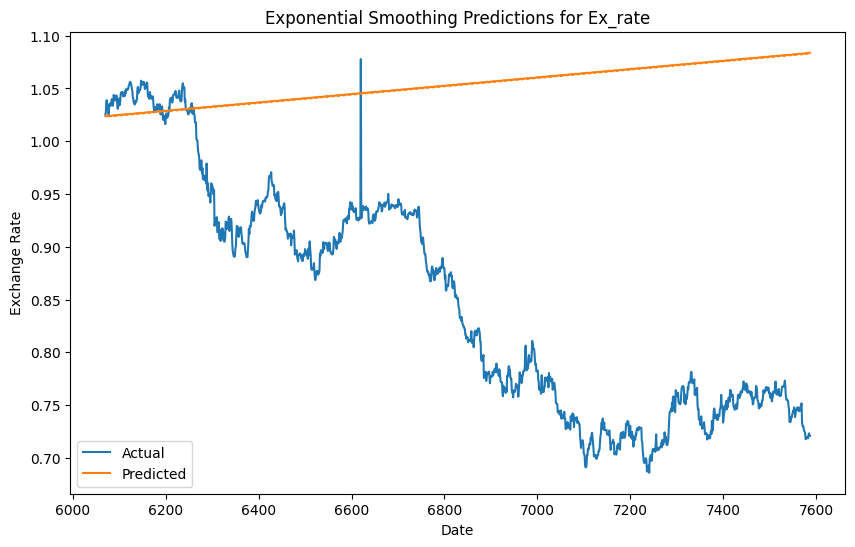

In [ ]:
for column in df.columns:
  print(f"Evaluating Exponential Smoothing model for {column}:")
  # Pass the correct arguments to the defined function
  mae,rmse,mape,predictions=evaluate_exponential_smoothing_model(df[column],trend='add',seasonal='add',seasonal_periods=12)
  if mae is not None:
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}")
    plt.figure(figsize=(10,6))
    # Ensure train_size is accessible here
    train_size=int(len(df[column])*0.8) # Redefine train_size for plotting context
    test = df[column][train_size:] # Redefine test for plotting context
    plt.plot(df.index[train_size:],test,label='Actual')
    plt.plot(df.index[train_size:],predictions,label='Predicted')
    plt.title(f'Exponential Smoothing Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()